In [1]:
! pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.9/388.9 kB 16.6 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3


In [2]:
! pip install textattack

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 445.7/445.7 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.3/388.3 kB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 769.7/769.7 kB 24.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.3/143.3 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 36.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.

### Importing necessary libraries for understanding data:

In [3]:
import nltk
import string
import gensim
import pandas as pd
from string import punctuation
from wordcloud import WordCloud
from nltk.corpus import stopwords
from datasets import load_dataset
from matplotlib import pyplot as plt
from gensim.utils import simple_preprocess

In [4]:
# loading dataset:
ag_news_dataset = load_dataset('ag_news', trust_remote_code=True)['train']
ag_news_dataset

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/120000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/7600 [00:00<?, ? examples/s]

Dataset({
    features: ['text', 'label'],
    num_rows: 120000
})

In [5]:
# let's look at first 3 news of above dataset:
ag_news_dataset[:3]

{'text': ["Wall St. Bears Claw Back Into the Black (Reuters) Reuters - Short-sellers, Wall Street's dwindling\\band of ultra-cynics, are seeing green again.",
  'Carlyle Looks Toward Commercial Aerospace (Reuters) Reuters - Private investment firm Carlyle Group,\\which has a reputation for making well-timed and occasionally\\controversial plays in the defense industry, has quietly placed\\its bets on another part of the market.',
  "Oil and Economy Cloud Stocks' Outlook (Reuters) Reuters - Soaring crude prices plus worries\\about the economy and the outlook for earnings are expected to\\hang over the stock market next week during the depth of the\\summer doldrums."],
 'label': [2, 2, 2]}

In [6]:
# the available categories in given dataset
ag_news_dataset.features['label'].names

['World', 'Sports', 'Business', 'Sci/Tech']

In [7]:
# converting the dataset to pandas dataframe for visualization purpose:
ag_news_dataset.set_format(type='pandas')
train_df = ag_news_dataset[:]
train_df.head()

,text,label
0,Wall St. Bears Claw Back Into the Black (Reute...,2
1,Carlyle Looks Toward Commercial Aerospace (Reu...,2
2,Oil and Economy Cloud Stocks' Outlook (Reuters...,2
3,Iraq Halts Oil Exports from Main Southern Pipe...,2
4,"Oil prices soar to all-time record, posing new...",2


In [8]:
# user defined function to convert label codes to corresponding label names
def label_to_label_names(row):
  return ag_news_dataset.features['label'].int2str(row)

In [9]:
train_df['label_name'] = train_df['label'].apply(label_to_label_names)
train_df.head(5)

,text,label,label_name
0,Wall St. Bears Claw Back Into the Black (Reute...,2,Business
1,Carlyle Looks Toward Commercial Aerospace (Reu...,2,Business
2,Oil and Economy Cloud Stocks' Outlook (Reuters...,2,Business
3,Iraq Halts Oil Exports from Main Southern Pipe...,2,Business
4,"Oil prices soar to all-time record, posing new...",2,Business


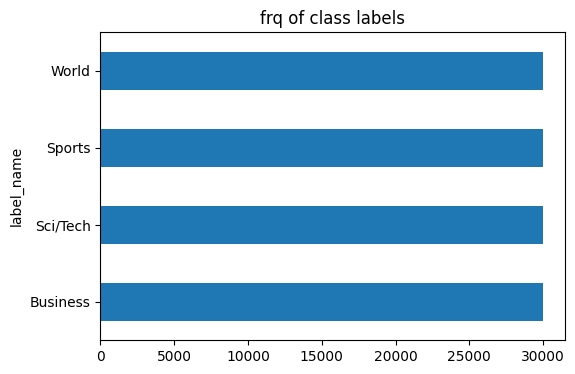

In [10]:
# let's see each category contains equal number of news or not!
plt.figure(figsize=(6,4))
train_df['label_name'].value_counts(ascending=True).plot.barh()
plt.title('frq of class labels');

In [11]:
# user defined function to remove punctuations
def remove_punctuations(msg):
  msg_with_no_punc = [char for char in msg if char not in punctuation]
  msg_with_no_punc_joined = ''.join(msg_with_no_punc)
  return msg_with_no_punc_joined

In [12]:
train_df['text_no_punc'] = train_df['text'].apply(remove_punctuations)

In [13]:
# loading stopwords list from nltk library
nltk.download('stopwords')
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [14]:
# extend stopwords list to visualize news more prominently
extend_list = ['wednesday', 'yesterday', 'one', 'saturday', 'monday', 'tuesday', 'today',
               'say', 'set', 'way', 'thursday', 'week', 'make', 'may', 'use', 'user',
               'help', 'sunday', 'day', 'time', 'still', 'says', 'said', 'year']
stop_words.extend(extend_list)

In [15]:
# user defined function to remove stop words
def remove_stop_words(txt):
  result = []
  for token in simple_preprocess(txt):
    if token not in stop_words and len(token) > 1:
      result.append(token)
    else:
      pass
  return result

In [16]:
train_df['text_no_punc_no_stopwords'] = train_df['text_no_punc'].apply(remove_stop_words)
train_df['text_no_punc_no_stopwords_joined'] = train_df['text_no_punc_no_stopwords'].apply(lambda x: ' '.join(x))

### Visualization of world news

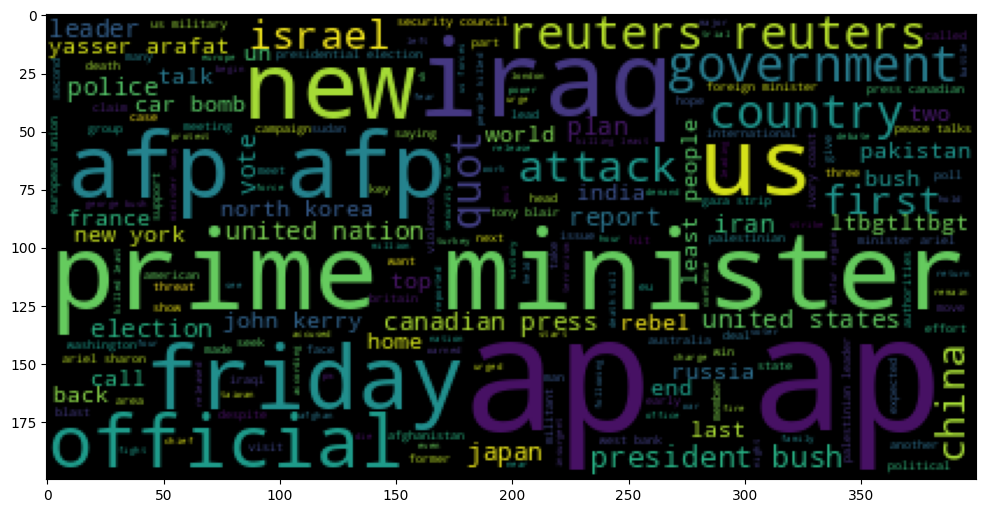

In [18]:
world_news_df = train_df[train_df['label_name'] == 'World']
world_news = world_news_df['text_no_punc_no_stopwords_joined'].tolist()
world_news_corpus = ' '.join(world_news)
plt.figure(figsize=(12,15))
plt.imshow(WordCloud().generate(world_news_corpus));

### Visualization of news related to sports category

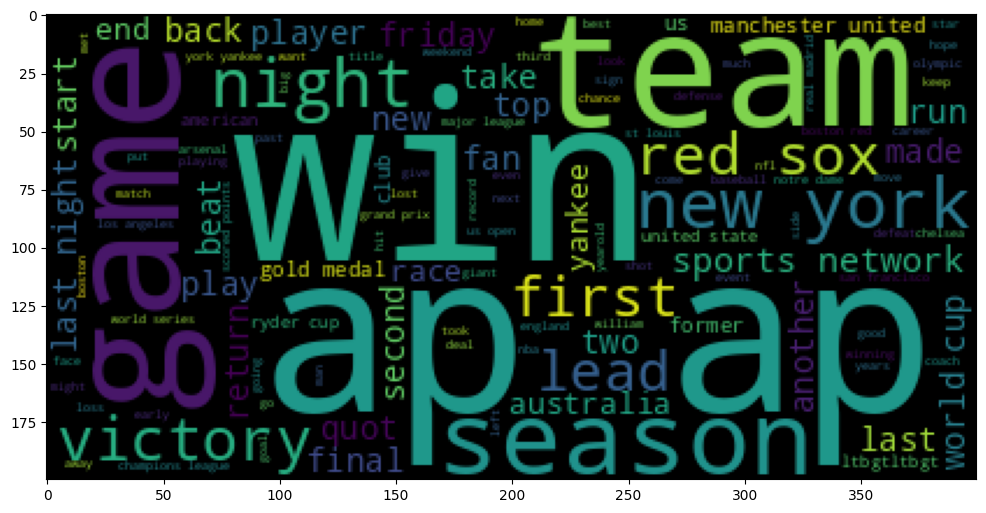

In [19]:
sports_news_df = train_df[train_df['label_name'] == 'Sports']
sports_news = sports_news_df['text_no_punc_no_stopwords_joined'].tolist()
sports_news_corpus = ' '.join(sports_news)
plt.figure(figsize=(12,15))
plt.imshow(WordCloud().generate(sports_news_corpus));

### Visualization of news related to Business category

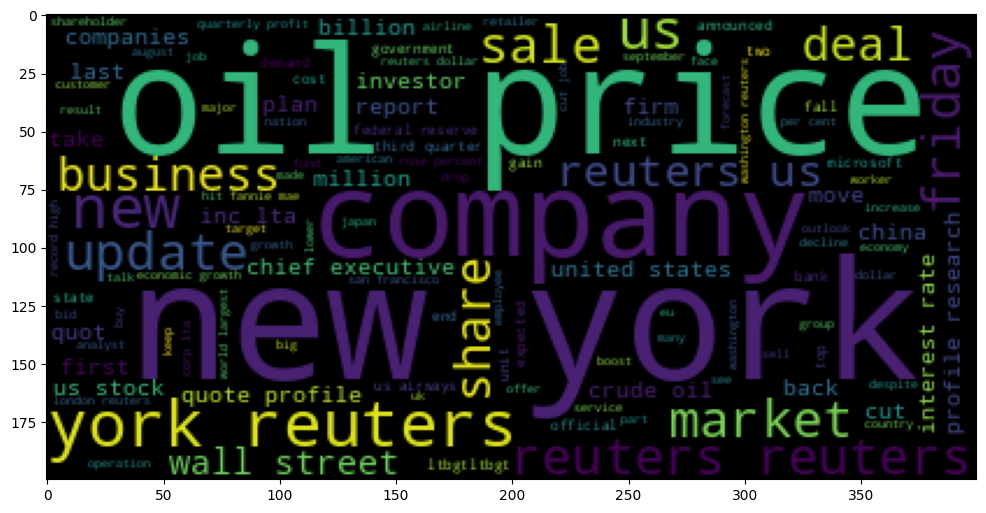

In [20]:
business_news_df = train_df[train_df['label_name'] == 'Business']
business_news = business_news_df['text_no_punc_no_stopwords_joined'].tolist()
business_news_corpus = ' '.join(business_news)
plt.figure(figsize=(12,15))
plt.imshow(WordCloud().generate(business_news_corpus));

### Visualization of news related to Science / Tech category

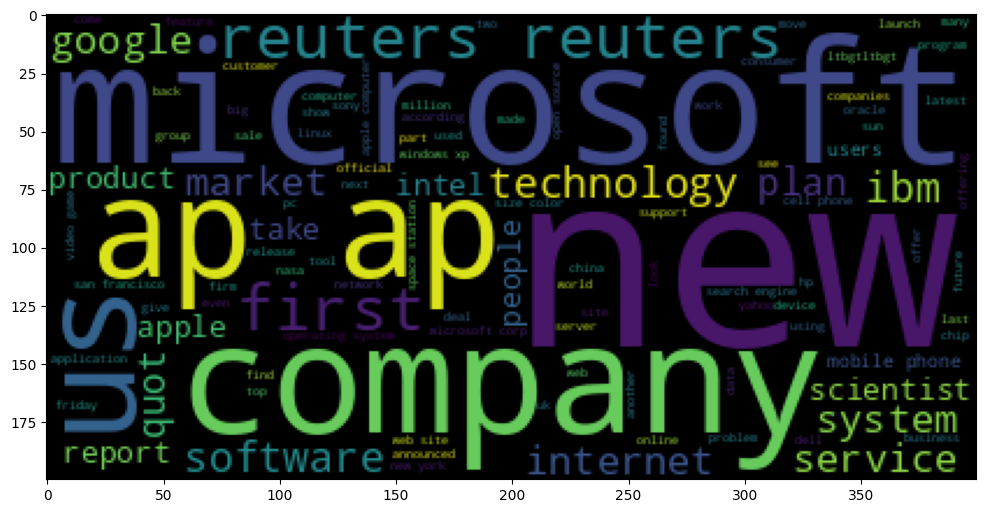

In [21]:
tech_news_df = train_df[train_df['label_name'] == 'Sci/Tech']
tech_news = tech_news_df['text_no_punc_no_stopwords_joined'].tolist()
tech_news_corpus = ' '.join(tech_news)
plt.figure(figsize=(12,15))
plt.imshow(WordCloud().generate(tech_news_corpus));

### Importing necessary libraries for text attack:

In [23]:
import torch
from textattack import Attacker
from textattack.datasets import HuggingFaceDataset
from textattack.attack_recipes import BERTAttackLi2020
from textattack.models.wrappers import HuggingFaceModelWrapper
from transformers import AutoModelForSequenceClassification, AutoTokenizer

textattack: Updating TextAttack package dependencies.
textattack: Downloading NLTK required packages.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw to /root/nltk_data...
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [25]:
dataset = HuggingFaceDataset("ag_news", None, "train")

textattack: Loading datasets dataset ag_news, split train.


In [26]:
model_name = "textattack/bert-base-uncased-ag-news"
original_model = AutoModelForSequenceClassification.from_pretrained(model_name)
original_tokenizer = AutoTokenizer.from_pretrained(model_name)
model = HuggingFaceModelWrapper(original_model, original_tokenizer)

config.json:   0%|          | 0.00/706 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [36]:
# importing bert attack:
attack = BERTAttackLi2020.build(model)

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

textattack: Unknown if model of class <class 'transformers.models.bert.modeling_bert.BertForSequenceClassification'> compatible with goal function <class 'textattack.goal_functions.classification.untargeted_classification.UntargetedClassification'>.


In [37]:
attacker = Attacker(attack, dataset)
attacker.attack_dataset();

Attack(
  (search_method): GreedyWordSwapWIR(
    (wir_method):  unk
  )
  (goal_function):  UntargetedClassification
  (transformation):  WordSwapMaskedLM(
    (method):  bert-attack
    (masked_lm_name):  BertForMaskedLM
    (max_length):  512
    (max_candidates):  48
    (min_confidence):  0.0005
  )
  (constraints): 
    (0): MaxWordsPerturbed(
        (max_percent):  0.4
        (compare_against_original):  True
      )
    (1): UniversalSentenceEncoder(
        (metric):  cosine
        (threshold):  0.2
        (window_size):  inf
        (skip_text_shorter_than_window):  False
        (compare_against_original):  True
      )
    (2): RepeatModification
    (3): StopwordModification
  (is_black_box):  True
) 



 10%|█         | 1/10 [01:47<16:10, 107.83s/it]

--------------------------------------------- Result 1 ---------------------------------------------


[Succeeded / Failed / Skipped / Total] 1 / 0 / 0 / 1:  10%|█         | 1/10 [01:48<16:13, 108.19s/it]

[[Business (96%)]] --> [[World (60%)]]

Wall St. Bears Claw Back Into the Black (Reuters) Reuters - [[Short-sellers]], Wall Street's dwindling\band of ultra-cynics, are seeing green again.

Wall St. Bears Claw Back Into the Black (Reuters) Reuters - [[short-newspapers]], Wall Street's dwindling\band of ultra-cynics, are seeing green again.




[Succeeded / Failed / Skipped / Total] 2 / 0 / 0 / 2:  20%|██        | 2/10 [02:08<08:33, 64.23s/it]

--------------------------------------------- Result 2 ---------------------------------------------
[[Business (100%)]] --> [[World (53%)]]

[[Carlyle]] Looks Toward [[Commercial]] [[Aerospace]] (Reuters) Reuters - [[Private]] investment [[firm]] [[Carlyle]] Group,\which has a [[reputation]] for [[making]] well-timed and [[occasionally]]\controversial plays in the defense [[industry]], has quietly [[placed]]\its [[bets]] on another part of the market.

.[[world]] Looks Toward [[international]] [[relations]] (Reuters) Reuters - [[stake]] investment [[venture]] [[carlyed]] Group,\which has a [[master]] for [[port]] well-timed and [[odd]]\controversial plays in the defense [[department]], has quietly [[defaulted]]\its [[bonds]] on another part of the market.




[Succeeded / Failed / Skipped / Total] 3 / 0 / 0 / 3:  30%|███       | 3/10 [02:12<05:09, 44.21s/it]

--------------------------------------------- Result 3 ---------------------------------------------
[[Business (100%)]] --> [[Sci/tech (88%)]]

Oil and Economy Cloud Stocks' [[Outlook]] (Reuters) Reuters - Soaring crude prices plus worries\about the economy and the outlook for earnings are expected to\hang over the stock market next week during the depth of the\[[summer]] doldrums.

Oil and Economy Cloud Stocks' [[climate]] (Reuters) Reuters - Soaring crude prices plus worries\about the economy and the outlook for earnings are expected to\hang over the stock market next week during the depth of the\[[monsoon]] doldrums.




[Succeeded / Failed / Skipped / Total] 4 / 0 / 0 / 4:  40%|████      | 4/10 [02:16<03:25, 34.19s/it]

--------------------------------------------- Result 4 ---------------------------------------------
[[Business (78%)]] --> [[World (53%)]]

Iraq Halts Oil Exports from Main Southern Pipeline (Reuters) Reuters - Authorities have halted oil export\flows from the main pipeline in southern [[Iraq]] after\intelligence showed a rebel militia could strike\infrastructure, an [[oil]] official said on Saturday.

Iraq Halts Oil Exports from Main Southern Pipeline (Reuters) Reuters - Authorities have halted oil export\flows from the main pipeline in southern [[theater]] after\intelligence showed a rebel militia could strike\infrastructure, an [[iraqi]] official said on Saturday.




[Succeeded / Failed / Skipped / Total] 5 / 0 / 0 / 5:  50%|█████     | 5/10 [02:19<02:19, 27.87s/it]

--------------------------------------------- Result 5 ---------------------------------------------
[[Business (99%)]] --> [[Sci/tech (66%)]]

Oil prices soar to all-time record, posing new menace to US [[economy]] (AFP) AFP - Tearaway world oil prices, toppling records and straining wallets, present a new economic menace barely three months before the US presidential elections.

Oil prices soar to all-time record, posing new menace to US [[internet]] (AFP) AFP - Tearaway world oil prices, toppling records and straining wallets, present a new economic menace barely three months before the US presidential elections.




[Succeeded / Failed / Skipped / Total] 6 / 0 / 0 / 6:  60%|██████    | 6/10 [02:36<01:44, 26.00s/it]

--------------------------------------------- Result 6 ---------------------------------------------
[[Business (100%)]] --> [[Sci/tech (53%)]]

[[Stocks]] End Up, But Near Year [[Lows]] (Reuters) [[Reuters]] - Stocks [[ended]] slightly higher on Friday\but stayed near [[lows]] for the year as [[oil]] prices surged past  #36;[[46]]\a barrel, [[offsetting]] a positive outlook from computer maker\Dell Inc. ([[DELL]].O)

[[i]] End Up, But Near Year [[low]]" (Reuters) [[wired]] - Stocks [[crashed]] slightly higher on Friday\but stayed near [[lowas]] for the year as [[austin]] prices surged past  #36;[[box]]\a barrel, [[offsetabove]] a positive outlook from computer maker\Dell Inc. ([[linux]].O)




[Succeeded / Failed / Skipped / Total] 7 / 0 / 0 / 7:  70%|███████   | 7/10 [02:44<01:10, 23.49s/it]

--------------------------------------------- Result 7 ---------------------------------------------
[[Business (100%)]] --> [[Sci/tech (61%)]]

Money Funds Fell in [[Latest]] Week (AP) AP - [[Assets]] of the nation's [[retail]] money market [[mutual]] funds fell by  #36;1.17 billion in the latest week to  #36;849.98 [[trillion]], the Investment Company Institute said Thursday.

Money Funds Fell in [[12th]] Week (AP) AP - [[treasury]] of the nation's [[online]] money market [[bond]] funds fell by  #36;1.17 billion in the latest week to  #36;849.98 [[crore]], the Investment Company Institute said Thursday.




[Succeeded / Failed / Skipped / Total] 8 / 0 / 0 / 8:  80%|████████  | 8/10 [02:50<00:42, 21.26s/it]

--------------------------------------------- Result 8 ---------------------------------------------
[[Business (100%)]] --> [[World (53%)]]

[[Fed]] minutes show dissent over inflation (USATODAY.com) USATODAY.com - [[Retail]] sales [[bounced]] back a bit in July, and new claims for jobless benefits fell last week, the government said Thursday, indicating the economy is improving from a midsummer slump.

[[government]] minutes show dissent over inflation (USATODAY.com) USATODAY.com - [[the]] sales [[was]] back a bit in July, and new claims for jobless benefits fell last week, the government said Thursday, indicating the economy is improving from a midsummer slump.




[Succeeded / Failed / Skipped / Total] 9 / 0 / 0 / 9:  90%|█████████ | 9/10 [02:53<00:19, 19.24s/it]

--------------------------------------------- Result 9 ---------------------------------------------
[[Business (100%)]] --> [[Sci/tech (100%)]]

Safety Net ([[Forbes]].com) [[Forbes]].com - After earning a PH.D. in Sociology, Danny Bazil Riley started to work as the general manager at a commercial real estate firm at an annual base salary of  #36;70,000. Soon after, a financial planner stopped by his desk to drop off brochures about insurance benefits available through his employer. But, at 32, "buying insurance was the furthest thing from my mind," says Riley.

Safety Net ([[twitter]].com) [[washington]].com - After earning a PH.D. in Sociology, Danny Bazil Riley started to work as the general manager at a commercial real estate firm at an annual base salary of  #36;70,000. Soon after, a financial planner stopped by his desk to drop off brochures about insurance benefits available through his employer. But, at 32, "buying insurance was the furthest thing from my mind," says Riley.




[Succeeded / Failed / Skipped / Total] 10 / 0 / 0 / 10: 100%|██████████| 10/10 [03:36<00:00, 21.62s/it]

--------------------------------------------- Result 10 ---------------------------------------------
[[Business (100%)]] --> [[World (55%)]]

Wall St. Bears Claw Back Into the Black  NEW [[YORK]] (Reuters) - [[Short-sellers]], Wall Street's dwindling  band of ultra-cynics, are seeing green again.

Wall St. Bears Claw Back Into the Black  NEW [[america]] (Reuters) - [[short-jews]], Wall Street's dwindling  band of ultra-cynics, are seeing green again.



+-------------------------------+--------+
| Attack Results                |        |
+-------------------------------+--------+
| Number of successful attacks: | 10     |
| Number of failed attacks:     | 0      |
| Number of skipped attacks:    | 0      |
| Original accuracy:            | 100.0% |
| Accuracy under attack:        | 0.0%   |
| Attack success rate:          | 100.0% |
| Average perturbed word %:     | 10.36% |
| Average num. words per input: | 38.5   |
| Avg num queries:              | 194.1  |
+------------------------